<a href="https://colab.research.google.com/github/hkchi-pham/study-it/blob/main/study-it/python/phan_tich_gia_nha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()

import os
print(os.listdir())

excel_file = 'house_sales.xlsx'
df = pd.read_excel(excel_file, engine='openpyxl')
df.info()

Saving house_sales.xlsx to house_sales.xlsx
['.config', 'house_sales.xlsx', 'sample_data']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19451 entries, 0 to 19450
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19451 non-null  int64  
 1   date           19451 non-null  object 
 2   bedrooms       19451 non-null  int64  
 3   bathrooms      19451 non-null  float64
 4   sqft_living    19451 non-null  int64  
 5   sqft_lot       19451 non-null  int64  
 6   floors         19451 non-null  float64
 7   waterfront     19451 non-null  int64  
 8   view           19451 non-null  int64  
 9   condition      19451 non-null  int64  
 10  grade          19451 non-null  int64  
 11  sqft_above     19451 non-null  int64  
 12  sqft_basement  19451 non-null  int64  
 13  yr_built       19451 non-null  int64  
 14  yr_renovated   19451 non-null  int64  
 15  zipcode        19451 non-null  int64  
 16  lat

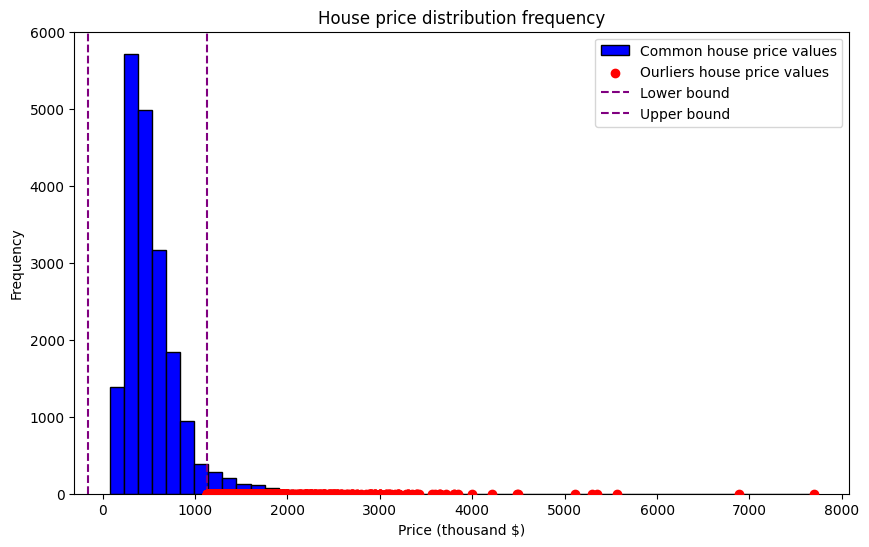

In [ ]:

price = df['price']

q1 = price.quantile(0.25)
q3 = price.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

outliers = df[(price <= lower_bound) | (price >= upper_bound)]
common_data = df[(price > lower_bound) & (price < upper_bound)]

plt.figure(figsize=(10, 6))
plt.hist(common_data['price']/1000, bins=50, color='blue', edgecolor='black', label="Common house price values")
plt.scatter(outliers['price']/1000, np.zeros_like(outliers['price']), color='red', label="Ourliers house price values", zorder=5)

plt.axvline(lower_bound/1000, color='purple', linestyle='--', label="Lower bound")
plt.axvline(upper_bound/1000, color='purple', linestyle='--', label="Upper bound")

plt.title("House price distribution frequency")
plt.xlabel("Price (thousand $)")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

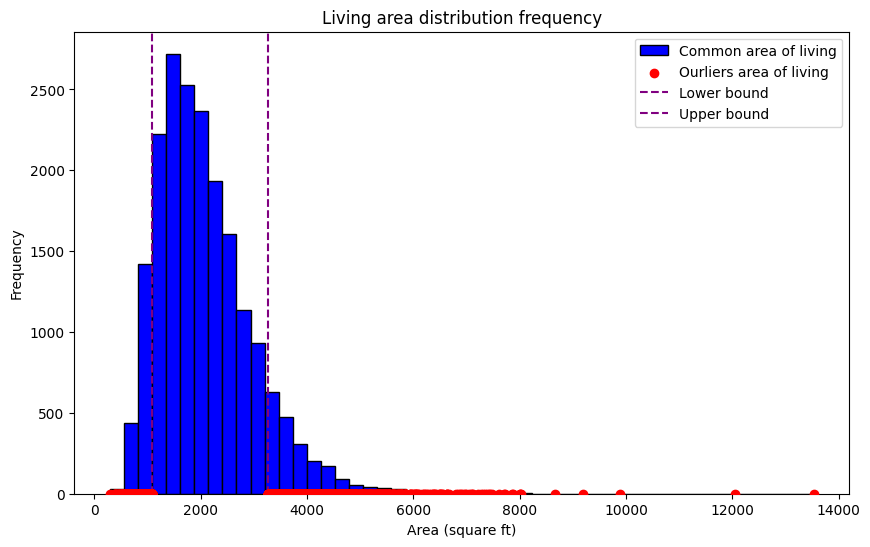

In [ ]:

living_area = df['sqft_living'].to_numpy()


lower_bound = np.percentile(living_area, 10)
upper_bound = np.percentile(living_area, 90)

outliers = df[(df['sqft_living'] <= lower_bound) | (df['sqft_living'] >= upper_bound)]
common_data = df[(df['sqft_living'] > lower_bound) | (df['sqft_living'] < upper_bound)]

plt.figure(figsize=(10, 6))
plt.hist(common_data['sqft_living'], bins=50, color='blue', edgecolor='black', label="Common area of living")
plt.scatter(outliers['sqft_living'], np.zeros_like(outliers['sqft_living']), color='red', label="Ourliers area of living", zorder=5)

plt.axvline(lower_bound, color='purple', linestyle='--', label="Lower bound")
plt.axvline(upper_bound, color='purple', linestyle='--', label="Upper bound")

plt.title("Living area distribution frequency")
plt.xlabel("Area (square ft)")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

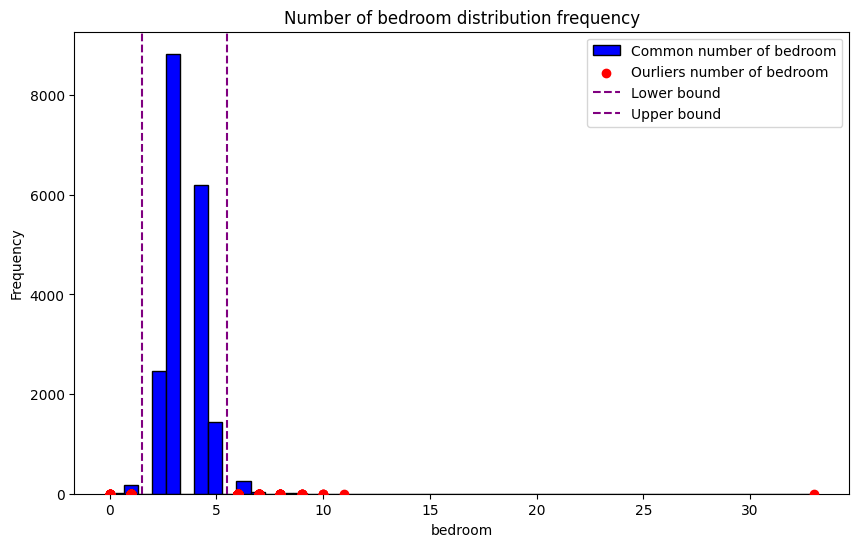

In [ ]:

bedroom = df['bedrooms']

q1 = bedroom.quantile(0.25)
q3 = bedroom.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(bedroom< lower_bound) | (bedroom >upper_bound)]
common_data = df[(bedroom >= lower_bound) | (bedroom<= upper_bound)]

plt.figure(figsize=(10, 6))
plt.hist(common_data['bedrooms'], bins=50, color='blue', edgecolor='black', label="Common number of bedroom")
plt.scatter(outliers['bedrooms'], np.zeros_like(outliers['bedrooms']), color='red', label="Ourliers number of bedroom", zorder=5)

plt.axvline(lower_bound, color='purple', linestyle='--', label="Lower bound")
plt.axvline(upper_bound, color='purple', linestyle='--', label="Upper bound")

plt.title("Number of bedroom distribution frequency")
plt.xlabel("bedroom")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

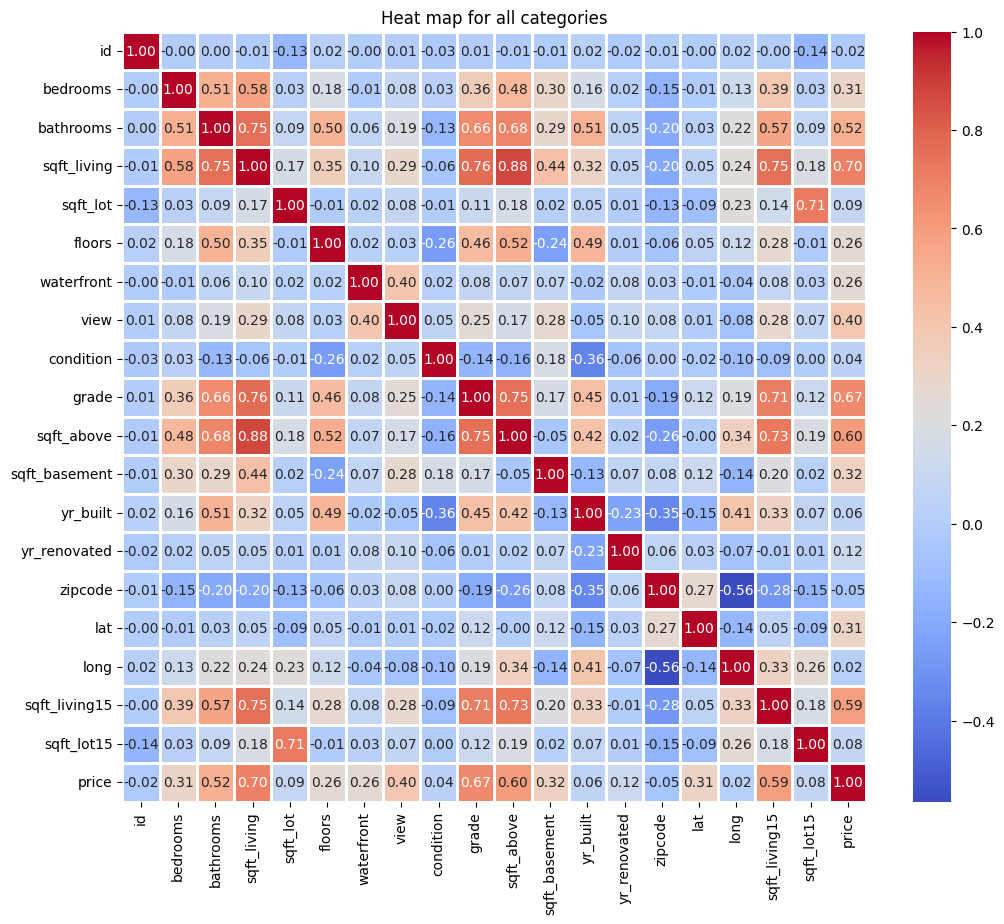

In [ ]:
number_value = df.select_dtypes(include=['float64','int64'])

plt.figure(figsize=(12,10))
sns.heatmap(number_value.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.8)

plt.title('Heat map for all categories')
plt.show()


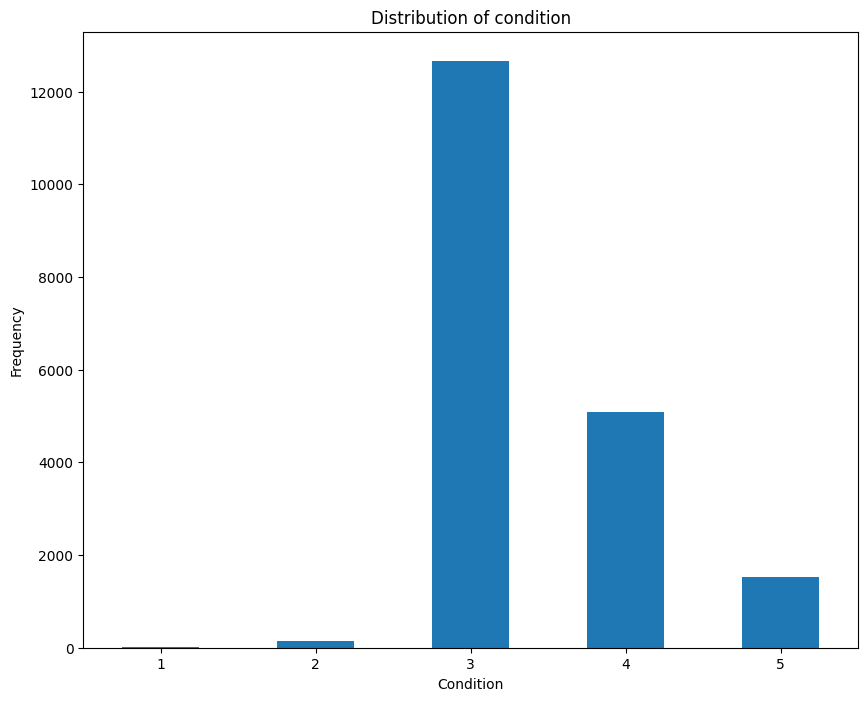

In [ ]:
house_condition = df.groupby('condition').size()

house_condition.plot(kind='bar', figsize=(10,8))
plt.title('Distribution of condition')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

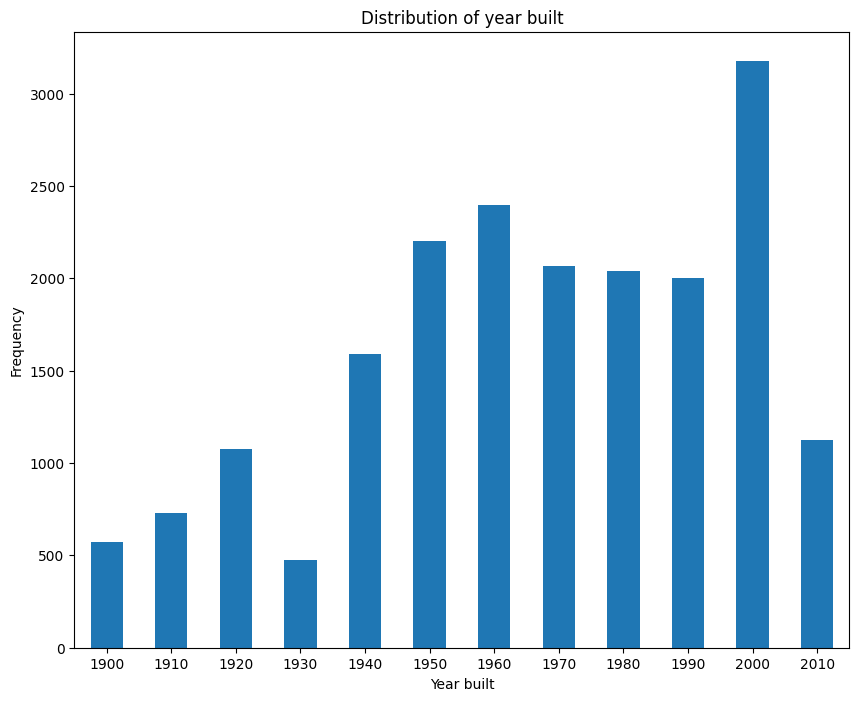

In [ ]:
df['year_interval'] = (df['yr_built']//10)*10
year_built = df.groupby('year_interval').size()

year_built.plot(kind='bar', figsize=(10,8))
plt.title('Distribution of year built')
plt.xlabel('Year built')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

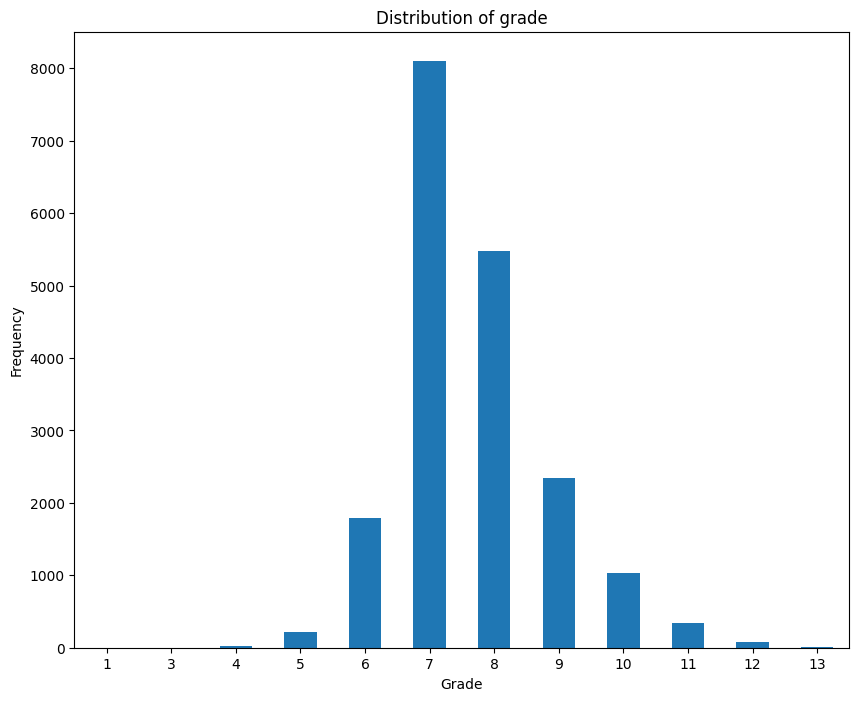

In [ ]:
house_grade = df.groupby('grade').size()

house_grade.plot(kind='bar', figsize=(10,8))
plt.title('Distribution of grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

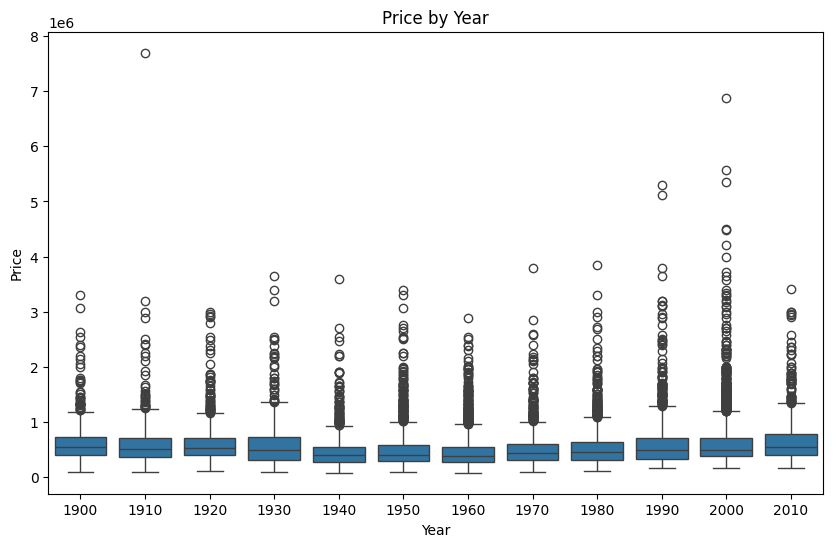

In [ ]:
plt.figure(figsize=(10,6))
df['year_interval'] = (df['yr_built']//10)*10
sns.boxplot(x='year_interval', y='price', data=df)

plt.title('Price by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

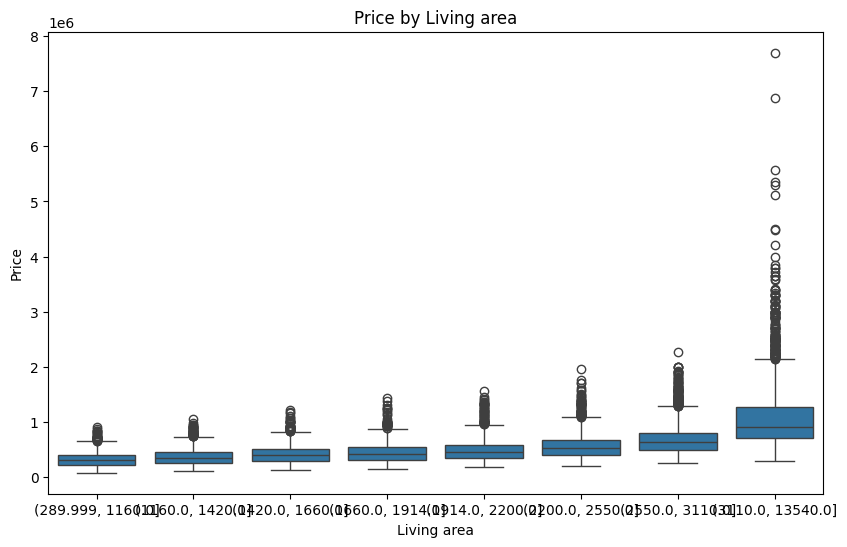

In [ ]:
plt.figure(figsize=(10,6))
df['area'] = pd.qcut(df['sqft_living'], q=8)
sns.boxplot(x='area', y='price', data=df)

plt.title('Price by Living area')
plt.xlabel('Living area')
plt.ylabel('Price')
plt.show()

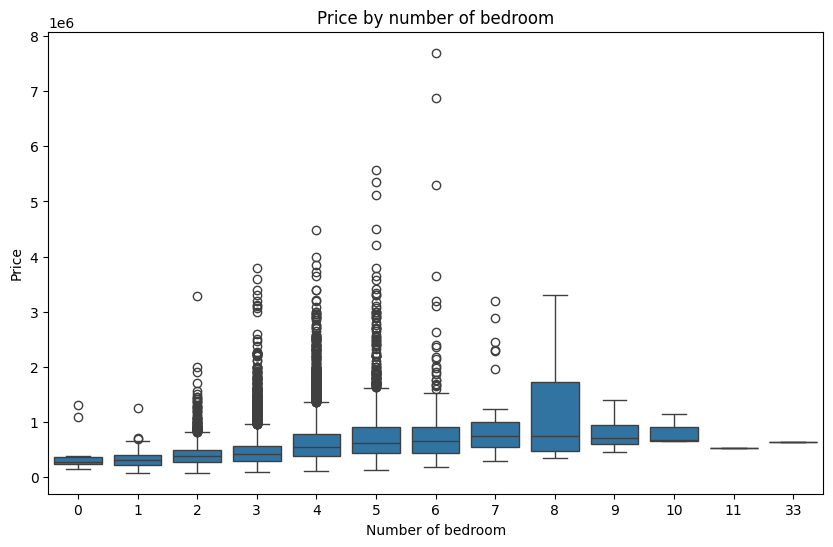

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=df)

plt.title('Price by number of bedroom')
plt.xlabel('Number of bedroom')
plt.ylabel('Price')
plt.show()

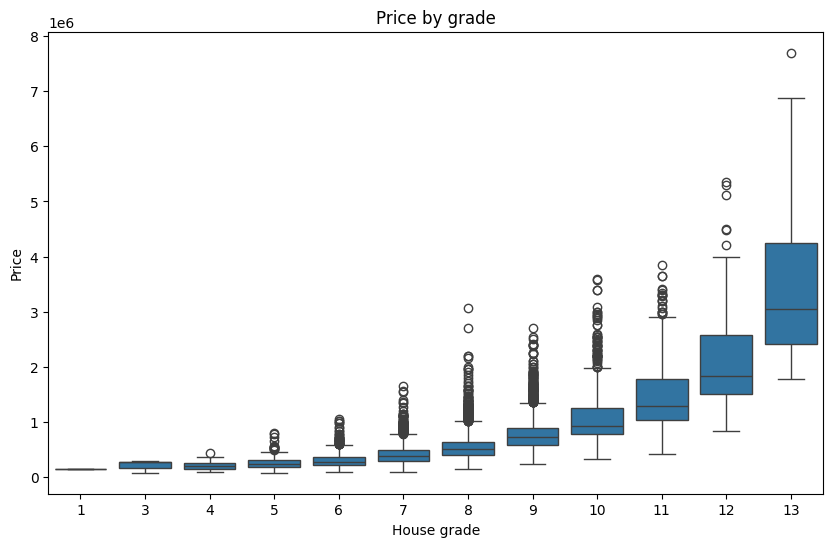

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grade', y='price', data=df)

plt.title('Price by grade')
plt.xlabel('House grade')
plt.ylabel('Price')
plt.show()

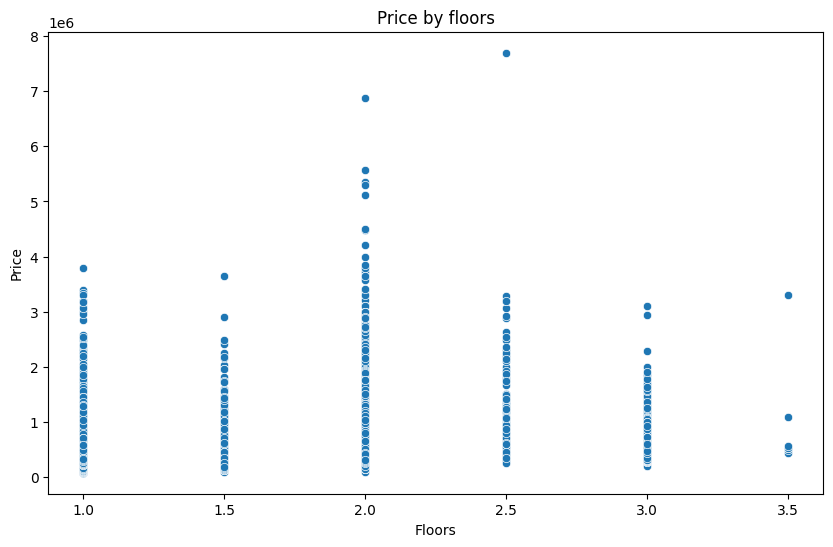

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='floors', y='price', data=df)

plt.title('Price by floors')
plt.xlabel('Floors')
plt.ylabel('Price')
plt.show()

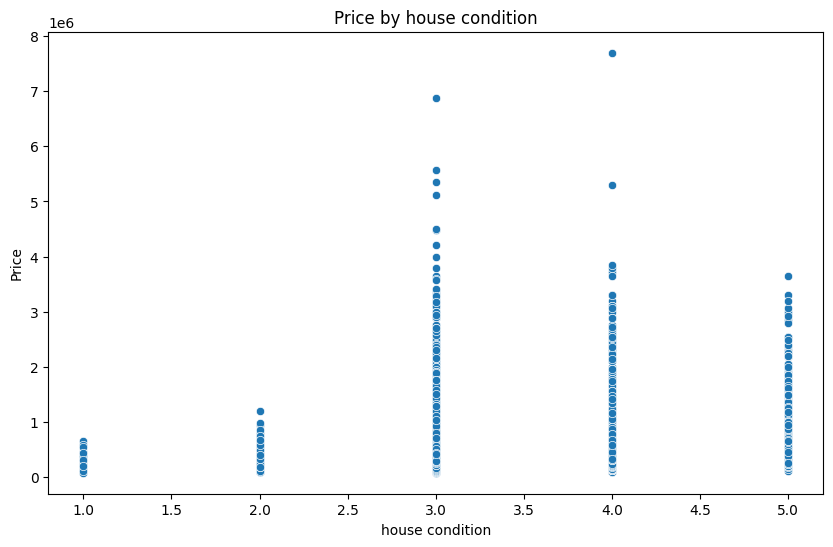

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='condition', y='price', data=df)

plt.title('Price by house condition')
plt.xlabel('house condition')
plt.ylabel('Price')
plt.show()

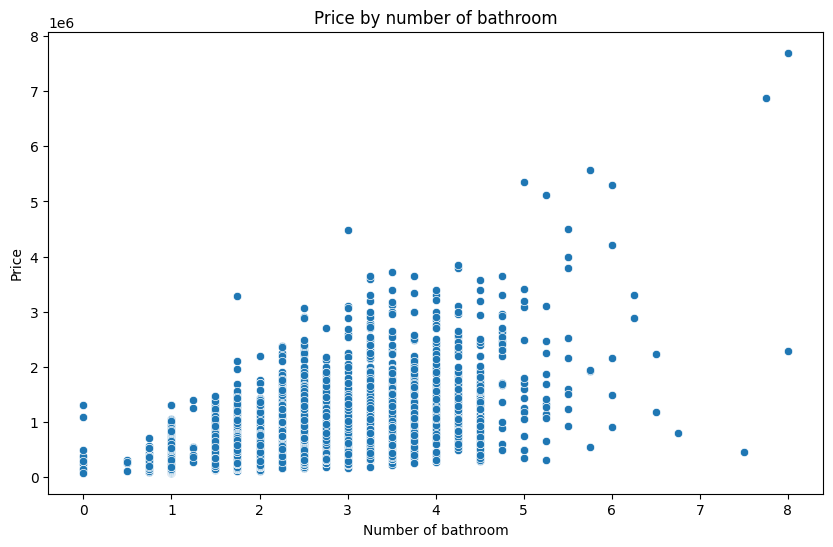

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='bathrooms', y='price', data=df)

plt.title('Price by number of bathroom')
plt.xlabel('Number of bathroom')
plt.ylabel('Price')
plt.show()